# Category Business Analyst Project

The purpose of this project is to conduct a comprehensive analysis of [retail sales data](https://archive.ics.uci.edu/dataset/352/online+retail) to uncover valuable insights into sales performance, customer behavior, inventory efficiency, and profitability. By analyzing transaction records, we aim to identify top-selling products, understand seasonal trends, segment customers for targeted marketing, and optimize inventory management. 

In [43]:
import pandas as pd

# Load the Dataset
df = pd.read_csv('Online Retail.csv')

# Display the first few row to gain an overview of the dataset
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


(  InvoiceNo StockCode                          Description  Quantity  \
 0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
 1    536365     71053                  WHITE METAL LANTERN         6   
 2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
 3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
 4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
 
     InvoiceDate  UnitPrice  CustomerID         Country  
 0  12/1/10 8:26       2.55     17850.0  United Kingdom  
 1  12/1/10 8:26       3.39     17850.0  United Kingdom  
 2  12/1/10 8:26       2.75     17850.0  United Kingdom  
 3  12/1/10 8:26       3.39     17850.0  United Kingdom  
 4  12/1/10 8:26       3.39     17850.0  United Kingdom  ,
 None)

In this dataset, several key variables are essential to our analysis. These include `InvoiceNo`, a unique identifier for each transaction, and `StockCode`, which represents the specific product being purchased. The `Description` field provides product names, allowing us to analyze sales by item. `Quantity` indicates the number of units sold per transaction, while `UnitPrice` gives the price per unit, both of which are crucial for calculating total sales revenue. `CustomerID` helps us track repeat purchases and segment customers by behavior. Finally, the `InvoiceDate` captures the transaction date, enabling monthly and seasonal trend analyses. Together, these variables provide a comprehensive view of purchasing patterns, product performance, and customer activity.

In [6]:
# Renaming the first column to remove any encoding artifacts and converting InvoiceDate to datetime format
df.rename(columns={df.columns[0]: 'InvoiceNo'}, inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors = 'coerce')

# Check for null values and basic stats for the Quantity and UnitPrice
missing_values = df.isnull().sum()
basic_stats = df[['Quantity', 'UnitPrice']].describe()

missing_values, basic_stats

(InvoiceNo           0
 StockCode           0
 Description      1454
 Quantity            0
 InvoiceDate         0
 UnitPrice           0
 CustomerID     135080
 Country             0
 dtype: int64,
             Quantity      UnitPrice
 count  541909.000000  541909.000000
 mean        9.552250       4.611114
 std       218.081158      96.759853
 min    -80995.000000  -11062.060000
 25%         1.000000       1.250000
 50%         3.000000       2.080000
 75%        10.000000       4.130000
 max     80995.000000   38970.000000)

In [7]:
# Remove rows where Quantity or UnitPrice is negative
df_cleaned = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Drop rows with missing values in Description as it is essential for identifying products
df_cleaned = df_cleaned.dropna(subset=['Description'])

# Check the resulting shape and ensure no negative values remain
df_cleaned.shape, df_cleaned[['Quantity', 'UnitPrice']].describe()

((530104, 8),
             Quantity      UnitPrice
 count  530104.000000  530104.000000
 mean       10.542037       3.907625
 std       155.524124      35.915681
 min         1.000000       0.001000
 25%         1.000000       1.250000
 50%         3.000000       2.080000
 75%        10.000000       4.130000
 max     80995.000000   13541.330000)

# Areas of Focus

### Total Sales Revenue

In [10]:
# Calculate sales revenue for each transaction
df_cleaned['SalesRevenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Calculate total sales revenue
total_sales_revenue = df_cleaned['SalesRevenue'].sum()
print("Total Sales Revenue:", total_sales_revenue)

Total Sales Revenue: 10666684.544


The total sales revenue for this period amounts to approximately `$10.7 million`, highlighting the substantial volume of transactions and customer demand across categories.

### Top-Selling Products

Top-Selling Products:
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64


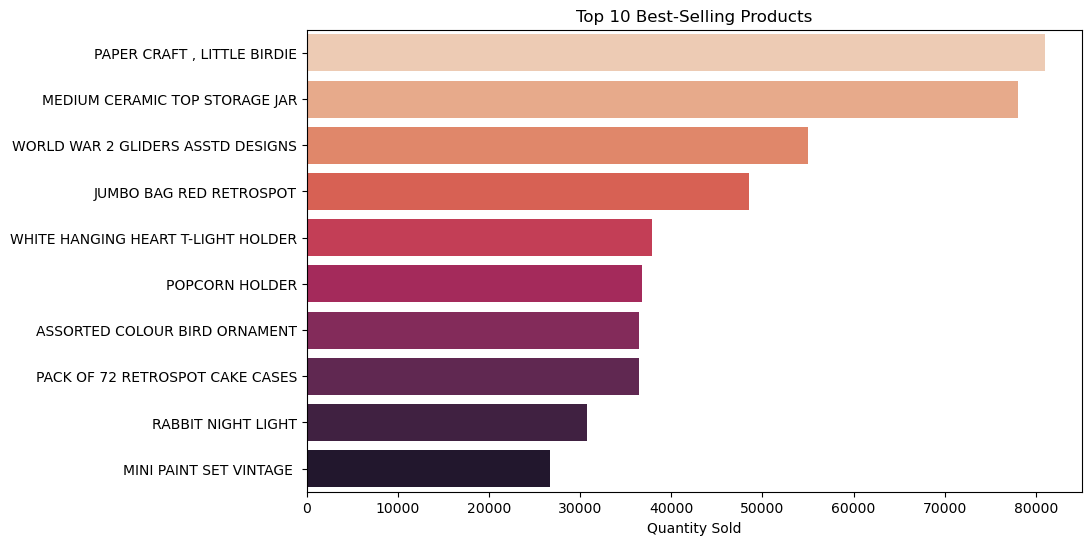

In [13]:
# Group by 'Description' and sum the quantities to find the top-selling products
top_selling_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top-Selling Products:\n", top_selling_products)

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for top-selling products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_products.values, y=top_selling_products.index, palette='rocket_r')

plt.xlabel('Quantity Sold')
plt.ylabel('')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=0)
plt.show()

The analysis of top-selling products reveals key items driving customer purchases. The top item, `Paper Craft, Little Birdie`, sold over `80,000` units, indicating strong demand likely due to its broad appeal and possibly versatile applications. Other high-ranking products, such as the `Medium Ceramic Top Storage Jar` and `World War 2 Gliders`, show a mix of decorative and functional items resonating with different customer segments. These findings suggest a trend towards both home décor and novelty items. Understanding these preferences can help refine inventory strategies, ensuring these popular items are well-stocked. Additionally, focusing marketing efforts on the highest-performing products could further capitalize on established customer interest, ultimately driving increased sales and brand loyalty.

### Inventory Turnover

In [16]:
# Calculate total quantity sold and approximate inventory turnover
total_quantity_sold = df_cleaned['Quantity'].sum()
unique_products = len(df_cleaned['StockCode'].unique())
inventory_turnover = total_quantity_sold / unique_products

print("Approximate Inventory Turnover:", inventory_turnover)

Approximate Inventory Turnover: 1424.8791432942376


With an approximate inventory turnover of `1,425`, our analysis suggests that stock is being sold and replenished frequently, pointing to a high level of demand and efficient inventory movement. This turnover rate indicates that our product assortment aligns well with customer preferences, helping minimize excess inventory and reduce holding costs.

### Monthly Sales Trends

Monthly Sales Trends:
 MonthYear
2010-12     823746.140
2011-01     691364.560
2011-02     523631.890
2011-03     717639.360
2011-04     537808.621
2011-05     770536.020
2011-06     761739.900
2011-07     719221.191
2011-08     759138.380
2011-09    1058590.172
2011-10    1154979.300
2011-11    1509496.330
2011-12     638792.680
Freq: M, Name: SalesRevenue, dtype: float64


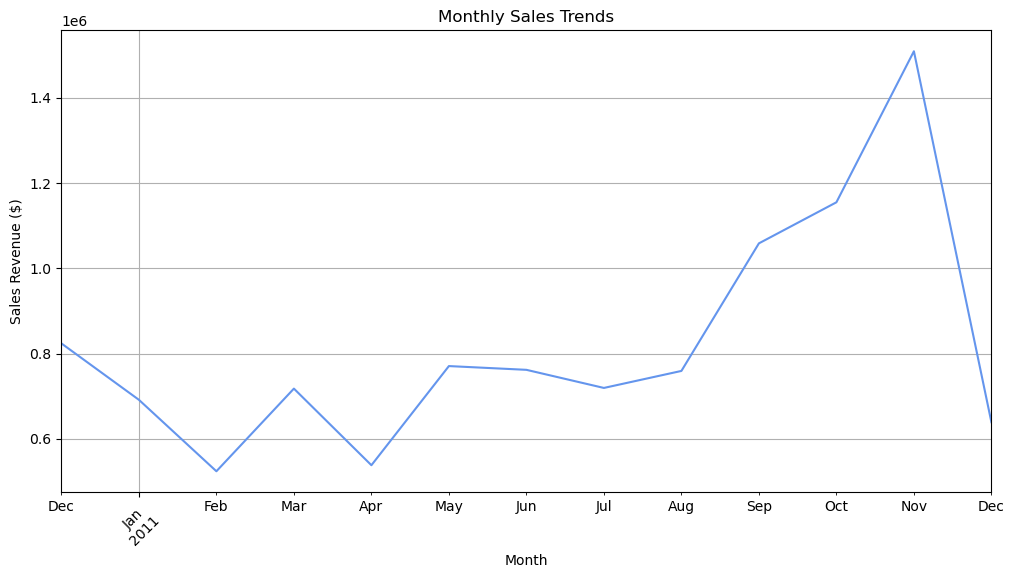

In [19]:
# Extract month and year from 'InvoiceDate' column
df_cleaned['MonthYear'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Group by MonthYear and calculate total sales revenue for each period
monthly_sales_trends = df_cleaned.groupby('MonthYear')['SalesRevenue'].sum()

print("Monthly Sales Trends:\n", monthly_sales_trends)

# Line plot for monthly sales trends
monthly_sales_trends.plot(figsize=(12, 6), color='cornflowerblue')
plt.ylabel('Sales Revenue ($)')
plt.xlabel('Month')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Our monthly sales trends reveal significant seasonality, with peak revenue occurring in late Q3 and Q4. Notably, `November` recorded the highest monthly sales, reaching over `$1.5 million`, likely due to increased holiday shopping. `October` and `September` also show strong performance, indicating the importance of this period for maximizing revenue. In contrast, early months like `January` and `February` display lower sales, likely reflecting a post-holiday drop in consumer spending.

## Customer Segmentation

Before conducting a customer segmentation analysis, it is crucial to recognize the diverse needs and behaviors within our customer base. By segmenting our customers, we can gain valuable insights into distinct groups, allowing us to tailor our marketing strategies and product offerings more effectively. This analysis will enable us to develop targeted campaigns that resonate with each segment, enhance the customer experience, and ultimately drive growth and profitability. As we embark on this segmentation process, we aim to uncover actionable insights that will inform our decision-making and strengthen our connection with our customers

In [41]:
from sklearn.cluster import KMeans

# Code for RFM score calculation and clustering
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df_cleaned['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'nunique',
    'SalesRevenue': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'SalesRevenue': 'Monetary'})

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=1, n_init = 10).fit(rfm[['Recency', 'Frequency', 'Monetary']])
rfm['Segment'] = kmeans.labels_
print(rfm.head(10))

# Count the number of customers in each segment
segment_counts = rfm['Segment'].value_counts()
print("Customer count in each segment:\n", segment_counts)

            Recency  Frequency  Monetary  Segment
CustomerID                                       
12346.0         325          1  77183.60        2
12347.0           1          7   4310.00        0
12348.0          74          4   1797.24        0
12349.0          18          1   1757.55        0
12350.0         309          1    334.40        0
12352.0          35          8   2506.04        0
12353.0         203          1     89.00        0
12354.0         231          1   1079.40        0
12355.0         213          1    459.40        0
12356.0          22          3   2811.43        0
Customer count in each segment:
 0    4300
2      31
1       5
3       2
Name: Segment, dtype: int64


From this analysis we can determine the following:

- `Segment 0`: Likely represents the majority of "average" or typical customers who have a balanced RFM score—neither too recent, frequent, nor high spenders.
- `Segment 2`: Likely represents a smaller group of high-value customers (with higher monetary values and/or specific recency and frequency patterns).
- `Segment 1 & 3`: These are smaller and may represent niche customer groups or customers with unique buying patterns (e.g., high-frequency, low-value; one-time high spenders).

## Product Category Performance

Next, I want to conduct a product category performance analysis to better understand which categories are driving the most revenue and which might need attention. By examining performance at the category level, I can identify high-performing segments that are central to our sales success, as well as underperforming categories that may benefit from strategic adjustments, such as targeted marketing, pricing changes, or inventory management.

Top 10 Product Categories by Revenue:
                                     Quantity  SalesRevenue
Description                                               
DOTCOM POSTAGE                           706     206248.77
REGENCY CAKESTAND 3 TIER               13879     174484.74
PAPER CRAFT , LITTLE BIRDIE            80995     168469.60
WHITE HANGING HEART T-LIGHT HOLDER     37891     106292.77
PARTY BUNTING                          18295      99504.33
JUMBO BAG RED RETROSPOT                48474      94340.05
MEDIUM CERAMIC TOP STORAGE JAR         78033      81700.92
Manual                                  7225      78112.82
POSTAGE                                 3150      78101.88
RABBIT NIGHT LIGHT                     30788      66964.99


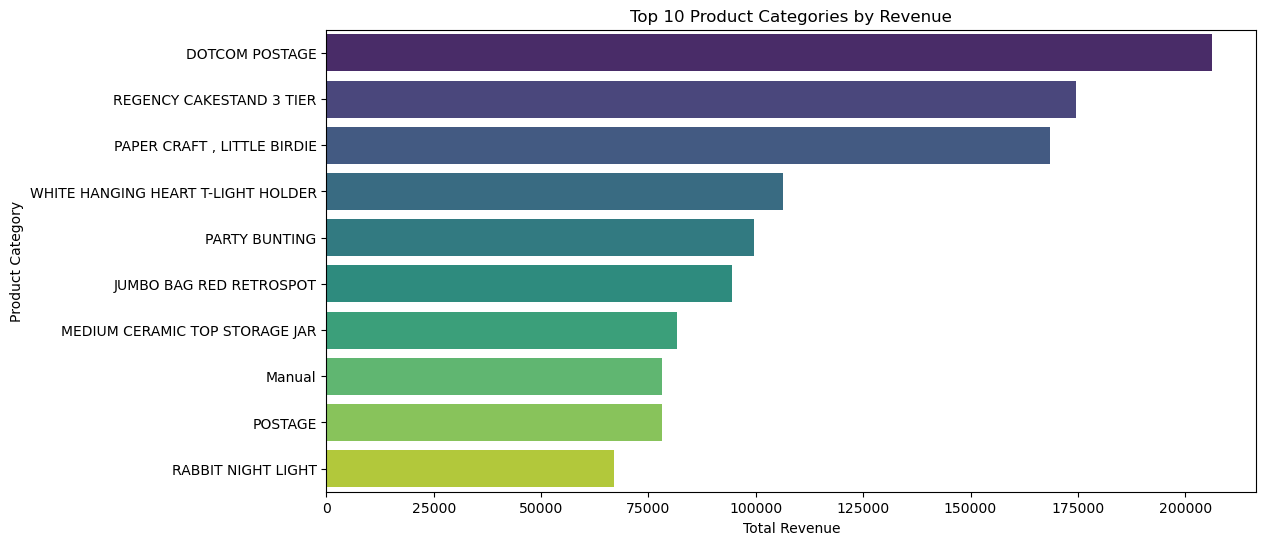

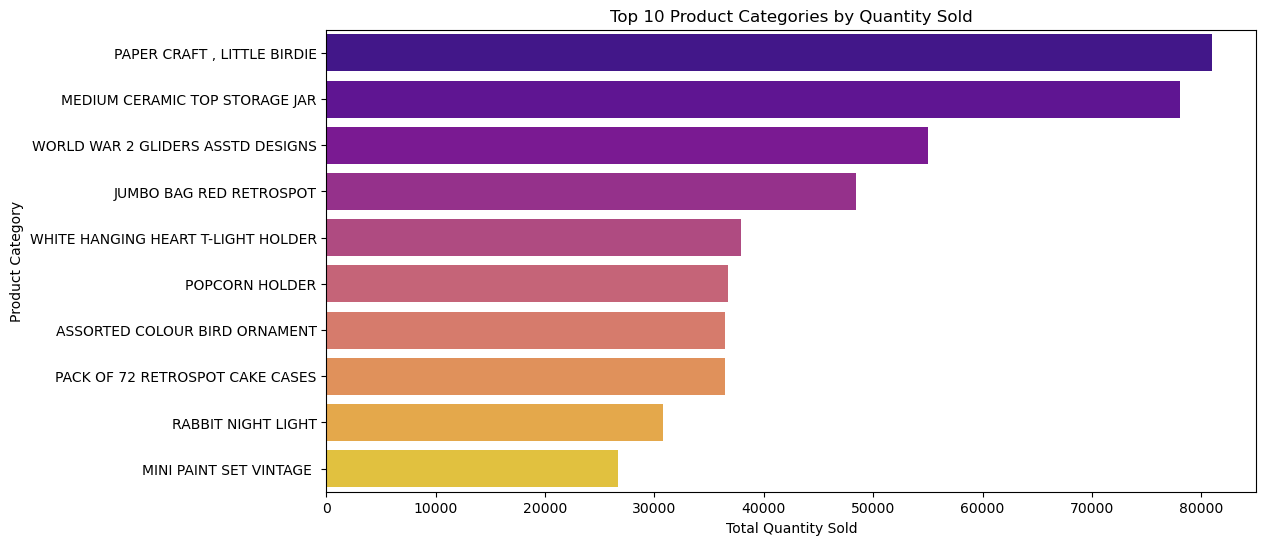

In [27]:
# Group by product Description to analyze performance by category
category_performance = df_cleaned.groupby('Description').agg({
    'Quantity': 'sum',     # Total quantity sold
    'SalesRevenue': 'sum'       # Total revenue generated
}).sort_values(by='SalesRevenue', ascending=False)

# Display top 10 performing categories by revenue
top_categories = category_performance.head(10)
print("Top 10 Product Categories by Revenue:\n", top_categories)

# Plot top categories by revenue
plt.figure(figsize=(12, 6))
sns.barplot(y=top_categories.index, x=top_categories['SalesRevenue'], palette='viridis')
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.show()

# Plot top categories by quantity sold for comparison
top_quantity_categories = category_performance.sort_values(by='Quantity', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_quantity_categories.index, x=top_quantity_categories['Quantity'], palette='plasma')
plt.title("Top 10 Product Categories by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Category")
plt.show()

This analysis of product performance by revenue and quantity provides valuable insights for our assortment strategy. `DOTCOM POSTAGE` leading in revenue, stands out as a high-margin item, while popular products like `PAPER CRAFT, LITTLE BIRDIE` and `REGENCY CAKESTAND 3 TIER` strike a strong balance between sales volume and revenue, marking them as key items for our category. The high quantity of lower-revenue items, such as the `RABBIT NIGHT LIGHT` indicates potential for these products to drive traffic and increase basket size. Understanding these dynamics allows us to make data-driven recommendations for promotions, stock levels, and pricing strategies to maximize profitability and meet customer demand effectively.

# Conclusion and Recommendations

As I wrap up this project, I've gained valuable insights into our sales performance, customer purchasing patterns, and inventory dynamics. With total sales revenue reaching approximately $10.7 million, it's clear that we have strong demand across our product categories, and there's significant potential to enhance profitability and operational efficiency through strategic actions.

### Top-Selling Products and Customer Demand: 

The data highlights `Paper Craft, Little Birdie` as our top item, with over `80,000` units sold, along with other high-demand products like the `Medium Ceramic Top Storage Jar` and `World War 2 Gliders`. These findings show that our customers are drawn to both decorative and functional products, suggesting a balanced interest in items that add value to their homes as well as unique novelty pieces. I recommend prioritizing stock for top sellers like "Paper Craft, Little Birdie" and "Medium Ceramic Top Storage Jar," especially leading into peak sales periods. Ensuring these high-demand items remain available will help prevent stockouts and capitalize on customer interest.
Given the Q3 and Q4 seasonality, pre-stocking key items before the holiday season will help us capture the full potential of this high-revenue period.

### Inventory Turnover: 

An inventory turnover rate of `1,425` indicates that our stock is moving quickly, which is a positive sign of alignment between our product assortment and customer needs. This level of turnover helps minimize excess stock, reduce holding costs, and supports a more efficient inventory cycle. 

### Seasonal Sales Trends: 

The monthly trends confirm that our strongest sales period is late `Q3` through `Q4`, with November alone generating over `$1.5 million` in revenue, likely driven by holiday shopping. By contrast, `January` and `February` show expected post-holiday dips, which we can factor into our future planning. 

To address the sales dip in `January` and `February`, I recommend implementing targeted promotions, discounts, or bundling offers on slower-moving items. Limited-time offers can help attract customers during these quieter months, supporting a steadier revenue flow.

### Optimize Assortment and Pricing Strategy:

Based on our product performance insights, refining our assortment by focusing on top-selling categories while reevaluating underperforming items will ensure our selection resonates with customer preferences.
For high-quantity, low-revenue items like the `Rabbit Night Light` price optimization or bundling could increase their impact on overall revenue, enhancing the value they bring to our category.

### Customer Segmentation: 

By segmenting our customer base, I identified groups with distinct purchasing behaviors, from high-value repeat customers to those with more moderate spending patterns. Understanding these segments allows us to tailor our marketing and engagement strategies, maximizing our ability to meet customers' unique needs and boost loyalty. Leveraging customer segmentation insights allows us to design more targeted, relevant communications. For high-frequency, lower-spending customers, value-driven promotions could encourage greater purchase frequency, while exclusive offers and early access to new products can help us retain high-value customers

### Focus Marketing on High-Performing Items:

Targeted marketing campaigns for high-revenue products, such as `DOTCOM POSTAGE` and `REGENCY CAKESTAND 3 TIER` could further leverage their popularity. Emphasizing their quality and versatility through social media, email, and on-site promotions could drive additional interest from high-value customer segments.
Tailoring marketing strategies based on customer segments can enhance engagement—offering personalized promotions to high-value customers, for example, could encourage repeat purchases and boost loyalty.